In [1]:
# Importing modules for usage
import os
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Change directory to file with artist Excel data from prior Jupyter file
os.chdir('/Users/garcgabe/Downloads/side work/artists')

The following dataset involves the Total amount of each artists top 50 more popular songs by pageviews. This means the music may or may not be on Spotify, as the data was pulled from Genius

In [27]:
# Initialize arrays for new DF creation
names, totals, weight_topsong, top10, bottom40, difference, weight_top10,  = ([] for i in range(7))

# count variable for easier access into arrays while looping
count = 0
for file in os.listdir():
    if 'Total' in file:
        name = file.split('Total')[0]
        names.append(name)
        # Temporarily create Pandas DF to read data
        temp = pd.read_excel(file)
        top10.append(sum(temp[0:10]['PageViews']))
        bottom40.append(sum(temp[11:]['PageViews']))
        totals.append(top10[count] + bottom40[count])
        difference.append(sum(temp[0:10]['PageViews']) - sum(temp[11:]['PageViews']))
        weight_topsong.append(round((temp.loc[0]['PageViews'] / sum(temp[0:]['PageViews'] )),3))
        weight_top10.append(top10[count] / (top10[count]+bottom40[count]))
        count+=1
        
# Creation of DF
total_df = pd.DataFrame(index = names)
# Merging arrays / creating columns with their names
total_df['totals'] = totals
total_df['top10'] = top10
total_df['bottom40'] = bottom40
total_df['difference'] = difference
total_df['weight_topsong'] = weight_topsong
total_df['weight_top10'] = weight_top10


Variable Definitions for each artist's top 50 songs:
    
    totals = the total number of Genius pageviews for the top 50 songs of the artist
    
    top10 = sum of pageviews for the top 10 most viewed songs on Genius
    bottom40 = sum of pageviews for the bottom 40 most viewed songs on Genius
    difference = top10 - bottom40 --> used to see how the 80/20 is weighted for each artist
    
    Weight Metrics:

    weight_topsong = the top song's pageviews divided by the artist's total pageviews
    weight_top10 = the sum of the top 10 songs' pageviews divided by the artist's total pageviews

In [28]:
# Values sorted by difference
total_df.sort_values('difference', ascending=False).head(10)

,totals,top10,bottom40,difference,weight_topsong,weight_top10
Migos,32028817,22527609,9501208,13026401,0.277,0.703354
BigSean,32135358,21817416,10317942,11499474,0.141,0.678922
RoddyRicch,9739988,7248964,2491024,4757940,0.321,0.744248
ScHoolboyQ,15547525,9917337,5630188,4287149,0.173,0.637872
21Savage,13958916,8980218,4978698,4001520,0.194,0.643332
KodakBlack,17525506,10469017,7056489,3412528,0.134,0.597359
JuiceWRLD,27042974,15171434,11871540,3299894,0.165,0.561012
TravisScott,55914403,29552335,26362068,3190267,0.154,0.528528
WizKhalifa,14023234,8454549,5568685,2885864,0.289,0.602896
A$APRocky,39388897,21090721,18298176,2792545,0.189,0.535448


In [29]:
# Values sorted by top song's weight
total_df.sort_values('weight_topsong', ascending=False).head(10)

,totals,top10,bottom40,difference,weight_topsong,weight_top10
RoddyRicch,9739988,7248964,2491024,4757940,0.321,0.744248
WizKhalifa,14023234,8454549,5568685,2885864,0.289,0.602896
Migos,32028817,22527609,9501208,13026401,0.277,0.703354
LilUziVert,33362038,17822800,15539238,2283562,0.235,0.534224
DaBaby,8596475,5283743,3312732,1971011,0.216,0.614641
21Savage,13958916,8980218,4978698,4001520,0.194,0.643332
PushaT,11737348,6849961,4887387,1962574,0.189,0.583604
A$APRocky,39388897,21090721,18298176,2792545,0.189,0.535448
VinceStaples,4917983,2675294,2242689,432605,0.173,0.543982
ScHoolboyQ,15547525,9917337,5630188,4287149,0.173,0.637872


In [30]:
# Values sorted by top 10 song's weight
total_df.sort_values('weight_top10', ascending=False).head(10)

,totals,top10,bottom40,difference,weight_topsong,weight_top10
RoddyRicch,9739988,7248964,2491024,4757940,0.321,0.744248
Migos,32028817,22527609,9501208,13026401,0.277,0.703354
BigSean,32135358,21817416,10317942,11499474,0.141,0.678922
21Savage,13958916,8980218,4978698,4001520,0.194,0.643332
ScHoolboyQ,15547525,9917337,5630188,4287149,0.173,0.637872
DaBaby,8596475,5283743,3312732,1971011,0.216,0.614641
WizKhalifa,14023234,8454549,5568685,2885864,0.289,0.602896
KodakBlack,17525506,10469017,7056489,3412528,0.134,0.597359
PushaT,11737348,6849961,4887387,1962574,0.189,0.583604
LilBaby,12940441,7261750,5678691,1583059,0.092,0.561167


In [7]:
# The top 7 most popular rappers (by PageViews) have 39,534,780 more PageViews than the bottom 32 rappers
# share of top rappers
top = 18
# 39 minus number of top rappers used
bottom = len(total_df)-top
share = top/len(total_df)
top_num = sum(total_df.sort_values('totals', ascending=False)['totals'].head(top))
bottom_num = sum(total_df.sort_values('totals', ascending=False)['totals'].tail(bottom))
diff_nums = top_num - bottom_num
top_percent = round(top_num/(top_num+bottom_num),3)
print('Share of top rappers: ' + str(round(share,3)) + '%')
print('Total Pageviews for top ' + str(top)+' rappers: '+str(top_num) + '\n' 'Total Pageviews for bottom '
      + str(bottom)+' rappers: '+str(bottom_num) + '\n' + 'Difference: '+str(diff_nums) + '\nShare for Top Artists: '
     +str(top_percent)+'%')

# This conclusion shows up that the 80/20 rule does not show up for pageviews in rap artists

Share of top rappers: 0.462%
Total Pageviews for top 18 rappers: 985643466
Total Pageviews for bottom 21 rappers: 259357842
Difference: 726285624
Share for Top Artists: 0.792%


In [8]:
# Drake has 2 million less PageViews than the bottom 13 rappers: WIz Khalifa, 21 Savage, Earl Sweatshirt, Lil Baby, 
# Pop Smoke, Trippie Redd, Pusha T, Polo G, Roddy Ricch, DaBaby, Lil Durk, Gunna, Isaiah Rashad, and Vince Staples

print(total_df.loc['Drake']['totals'])
print(sum(total_df.sort_values('totals', ascending=False)['totals'].tail(14)))

145193691.0
146818822


In [9]:
total_df['difference'].describe()

count    3.900000e+01
mean    -5.007973e+05
std      7.608869e+06
min     -3.306924e+07
25%     -8.157335e+05
50%      5.208140e+05
75%      2.630336e+06
max      1.302640e+07
Name: difference, dtype: float64

<AxesSubplot:xlabel='totals', ylabel='weight_topsong'>

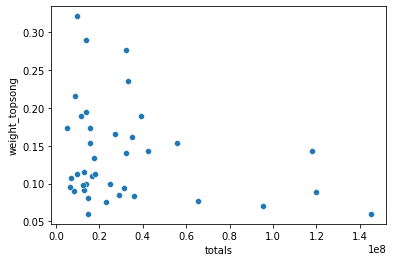

In [10]:
# We see that the top 5 artists in terms of total pageviews usually have a low weight of their top songs, except
# for Eminem, who stands out slightly for having a top song weight of 0.143.
 
sb.scatterplot(data=total_df, x='totals',y='weight_topsong')

<AxesSubplot:xlabel='totals', ylabel='weight_top10'>

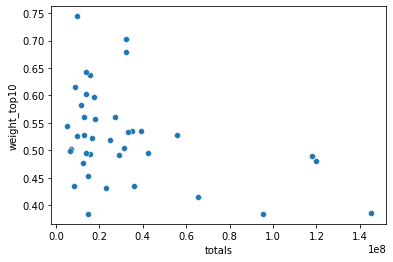

In [11]:
sb.scatterplot(data=total_df, x='totals',y='weight_top10')

In [31]:
total_df_diffsort = total_df.sort_values(by='difference')[3:]

<AxesSubplot:xlabel='difference', ylabel='weight_top10'>

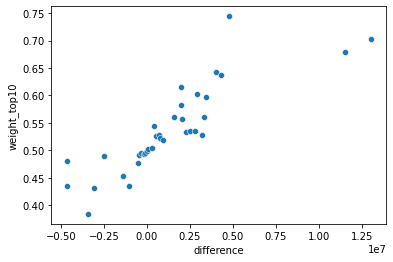

In [32]:
sb.scatterplot(data=total_df_diffsort, x='difference',y='weight_top10')

In [15]:
total_df.sort_values(by='totals',ascending=False).head(10)

,totals,top10,bottom40,difference,weight_topsong,weight_top10
Drake,145193691,56062224,89131467,-33069243,0.060,0.386120
KendrickLamar,119890848,57623168,62267680,-4644512,0.089,0.480630
Eminem,117834177,57671444,60162733,-2491289,0.143,0.489429
KanyeWest,95475915,36771943,58703972,-21932029,0.070,0.385144
J.Cole,65649187,27247292,38401895,-11154603,0.077,0.415044
TravisScott,55914403,29552335,26362068,3190267,0.154,0.528528
JAY-Z,42521590,21091686,21429904,-338218,0.143,0.496023
A$APRocky,39388897,21090721,18298176,2792545,0.189,0.535448
TylerTheCreator,35833158,15580037,20253121,-4673084,0.084,0.434794
Future,35033339,18750733,16282606,2468127,0.161,0.535225


In [33]:
low_diff = total_df.sort_values(by='difference',ascending=True).head(10)
high_diff = total_df.sort_values(by='difference',ascending=False).head(10)

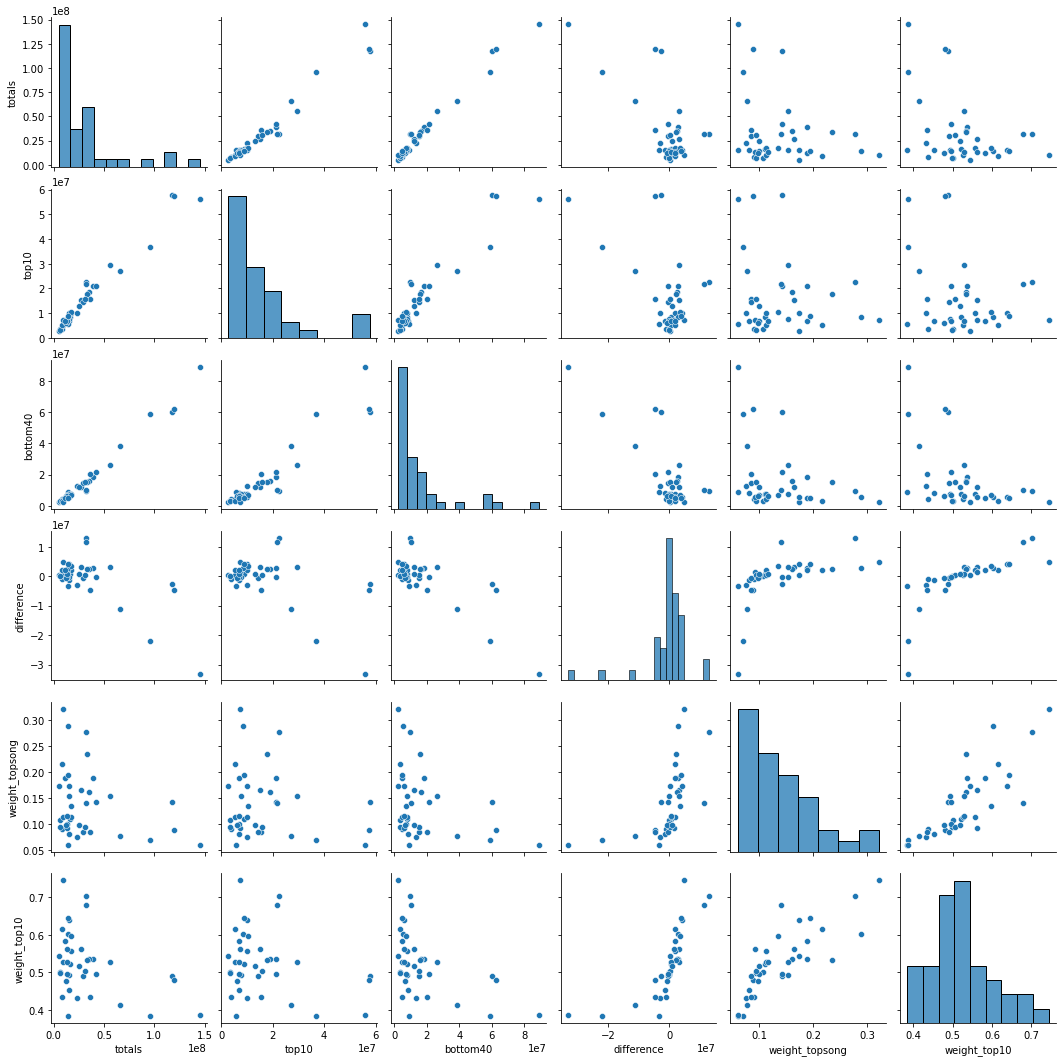

In [16]:
sb.pairplot(data=total_df)

<AxesSubplot:xlabel='difference', ylabel='Count'>

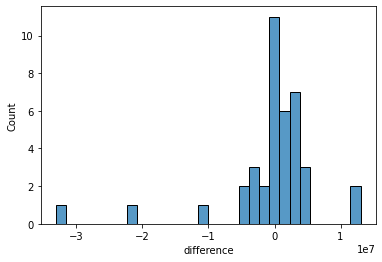

In [17]:
sb.histplot(data=total_df, x='difference',bins=30)

In [10]:
# Sorted by difference
low_diff = total_df[total_df['difference']<0].sort_values('difference').head(10)

<AxesSubplot:xlabel='difference', ylabel='weight_top10'>

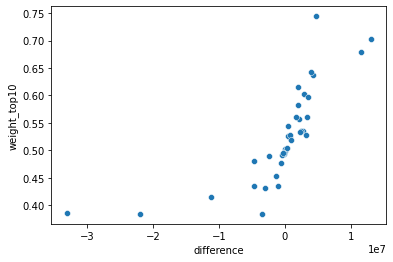

In [14]:
sb.scatterplot(x='difference', y='weight_top10', data=total_df)

<AxesSubplot:xlabel='difference', ylabel='weight_topsong'>

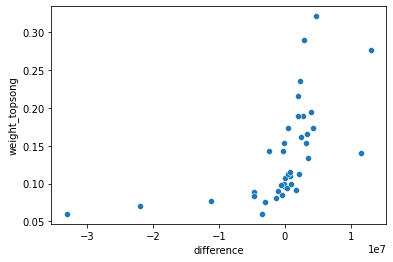

In [19]:
sb.scatterplot(x='difference', y='weight_topsong', data=total_df)

In [43]:
names, totals, weight_topsong, top, bottom, difference, weight_top, total_main_diff, main_count = ([] for i in range(9))

count = 0
for file in os.listdir():
    internal_count = 0
    if 'Main' in file:
        name = file.split('Main')[0]
        names.append(name)
        temp = pd.read_excel(file)
        internal_count = len(temp)
        top_half = int(internal_count/5)
        top.append(sum(temp[0:top_half]['PageViews']))
        bottom.append(sum(temp[top_half:]['PageViews']))
        totals.append(top[count] + bottom[count])
        difference.append(sum(temp[0:top_half]['PageViews']) - sum(temp[top_half:]['PageViews']))
        weight_topsong.append(round((temp.loc[0]['PageViews'] / sum(temp[0:]['PageViews'] )),3))
        weight_top.append(top[count] / (top[count]+bottom[count]))
        total_main_diff.append(total_df.loc[name]['totals'] - top[count] - bottom[count])
        main_count.append(internal_count)
        count+=1
        
main_df = pd.DataFrame(index = names)

main_df['totals'] = totals
main_df['top'] = top
main_df['bottom'] = bottom
main_df['difference'] = difference
main_df['weight_topsong'] = weight_topsong
main_df['weight_top'] = weight_top
main_df['total_main_diff'] = total_main_diff
main_df['main_count'] = main_count